In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import numpy as np
import sklearn as sk

In [6]:
filepath = 'volve production data.xlsx'

In [7]:
daily_df = pd.read_excel(filepath, sheet_name='Daily Production Data')
monthly_df = pd.read_excel(filepath, sheet_name='Monthly Production Data')

In [8]:
print(daily_df.shape)
print(monthly_df.shape)
print(daily_df.head())
print(daily_df.columns)
print(monthly_df.columns)

(15634, 24)
(527, 10)
     DATEPRD WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0 2014-04-07  NO 15/9-F-1 C                7405         15/9-F-1 C   
1 2014-04-08  NO 15/9-F-1 C                7405         15/9-F-1 C   
2 2014-04-09  NO 15/9-F-1 C                7405         15/9-F-1 C   
3 2014-04-10  NO 15/9-F-1 C                7405         15/9-F-1 C   
4 2014-04-11  NO 15/9-F-1 C                7405         15/9-F-1 C   

   NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0         3420717          VOLVE             369304    MÆRSK INSPIRER   
1         3420717          VOLVE             369304    MÆRSK INSPIRER   
2         3420717          VOLVE             369304    MÆRSK INSPIRER   
3         3420717          VOLVE             369304    MÆRSK INSPIRER   
4         3420717          VOLVE             369304    MÆRSK INSPIRER   

   ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  ...  AVG_CHOKE_UOM  AVG_WHP_P  \
0            0.0                0.00000  ...

In [9]:
print("\n Data Type")
print(daily_df.dtypes)

print("\n Missing Values")
print(daily_df.isnull().sum())


 Data Type
DATEPRD                     datetime64[ns]
WELL_BORE_CODE                      object
NPD_WELL_BORE_CODE                   int64
NPD_WELL_BORE_NAME                  object
NPD_FIELD_CODE                       int64
NPD_FIELD_NAME                      object
NPD_FACILITY_CODE                    int64
NPD_FACILITY_NAME                   object
ON_STREAM_HRS                      float64
AVG_DOWNHOLE_PRESSURE              float64
AVG_DOWNHOLE_TEMPERATURE           float64
AVG_DP_TUBING                      float64
AVG_ANNULUS_PRESS                  float64
AVG_CHOKE_SIZE_P                   float64
AVG_CHOKE_UOM                       object
AVG_WHP_P                          float64
AVG_WHT_P                          float64
DP_CHOKE_SIZE                      float64
BORE_OIL_VOL                       float64
BORE_GAS_VOL                       float64
BORE_WAT_VOL                       float64
BORE_WI_VOL                        float64
FLOW_KIND                           object

In [10]:
well_name = daily_df['NPD_WELL_BORE_NAME'].unique()[0]
well_data = daily_df[daily_df['NPD_WELL_BORE_NAME'] == well_name]

In [11]:
well_data = well_data.sort_values("DATEPRD")

In [12]:
wells = daily_df['NPD_WELL_BORE_NAME'].unique()
print(f"Total number of wells: {len(wells)}")

Total number of wells: 7


In [13]:
well_summary = daily_df.groupby('NPD_WELL_BORE_NAME')[["BORE_OIL_VOL", "BORE_WAT_VOL", "BORE_GAS_VOL"]].agg(['sum']).reset_index()
well_summary = well_summary.sort_values(('BORE_OIL_VOL', 'sum'), ascending=False)
print("\n Well Summary (Top Wells by Oil Volume)")
print(well_summary.head(10))


 Well Summary (Top Wells by Oil Volume)
  NPD_WELL_BORE_NAME BORE_OIL_VOL BORE_WAT_VOL  BORE_GAS_VOL
                              sum          sum           sum
2          15/9-F-12   4579609.55   6833320.37  6.675423e+08
3          15/9-F-14   3942233.39   7121249.74  5.780095e+08
1          15/9-F-11   1147849.10   1090806.27  1.743105e+08
0         15/9-F-1 C    177709.33    207302.39  2.644092e+07
4        15/9-F-15 D    148518.56     52366.40  2.250535e+07
6           15/9-F-5     41160.68     13533.18  6.561826e+06
5           15/9-F-4         0.00         0.00  0.000000e+00


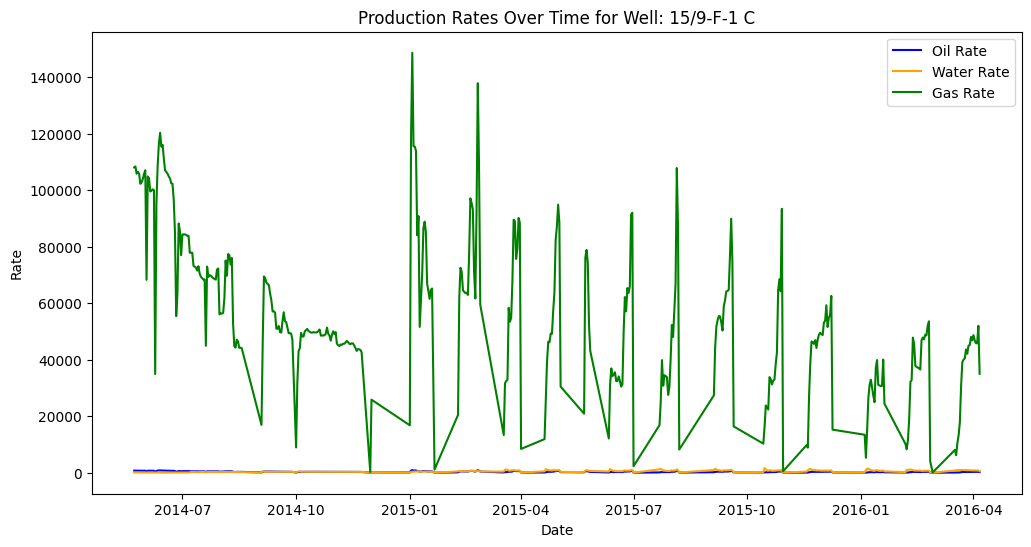

In [14]:
well_data = well_data[(well_data['BORE_OIL_VOL'] != 0) & 
                      (well_data['BORE_WAT_VOL'] != 0) & 
                      (well_data['BORE_GAS_VOL'] != 0)]
plt.figure(figsize=(12, 6))
plt.plot(well_data['DATEPRD'], well_data['BORE_OIL_VOL'], label='Oil Rate', color='blue')
plt.plot(well_data['DATEPRD'], well_data['BORE_WAT_VOL'], label='Water Rate', color='orange')
plt.plot(well_data['DATEPRD'], well_data['BORE_GAS_VOL'], label='Gas Rate', color='green')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title(f'Production Rates Over Time for Well: {well_name}')
plt.legend()
plt.show()  

<Axes: title={'center': 'Oil production for all wells'}, xlabel='DATEPRD', ylabel='BORE_OIL_VOL'>

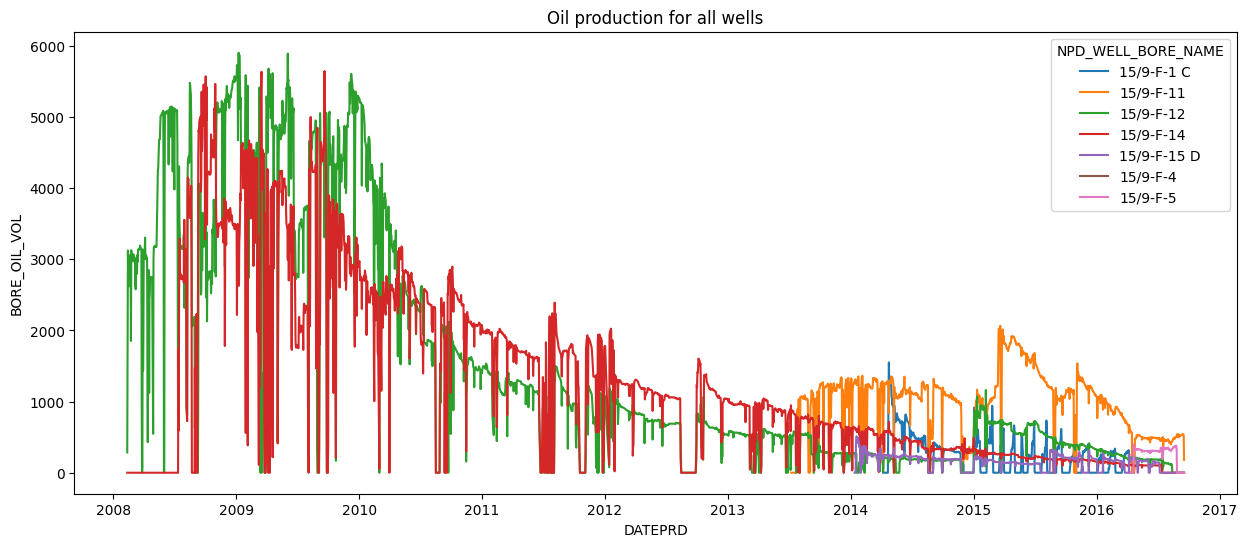

In [15]:
plt.figure(figsize=(15,6))
plt.title("Oil production for all wells")
sns.lineplot(data = daily_df ,x ="DATEPRD" , y = "BORE_OIL_VOL" ,hue ="NPD_WELL_BORE_NAME",)

<function matplotlib.pyplot.show(close=None, block=None)>

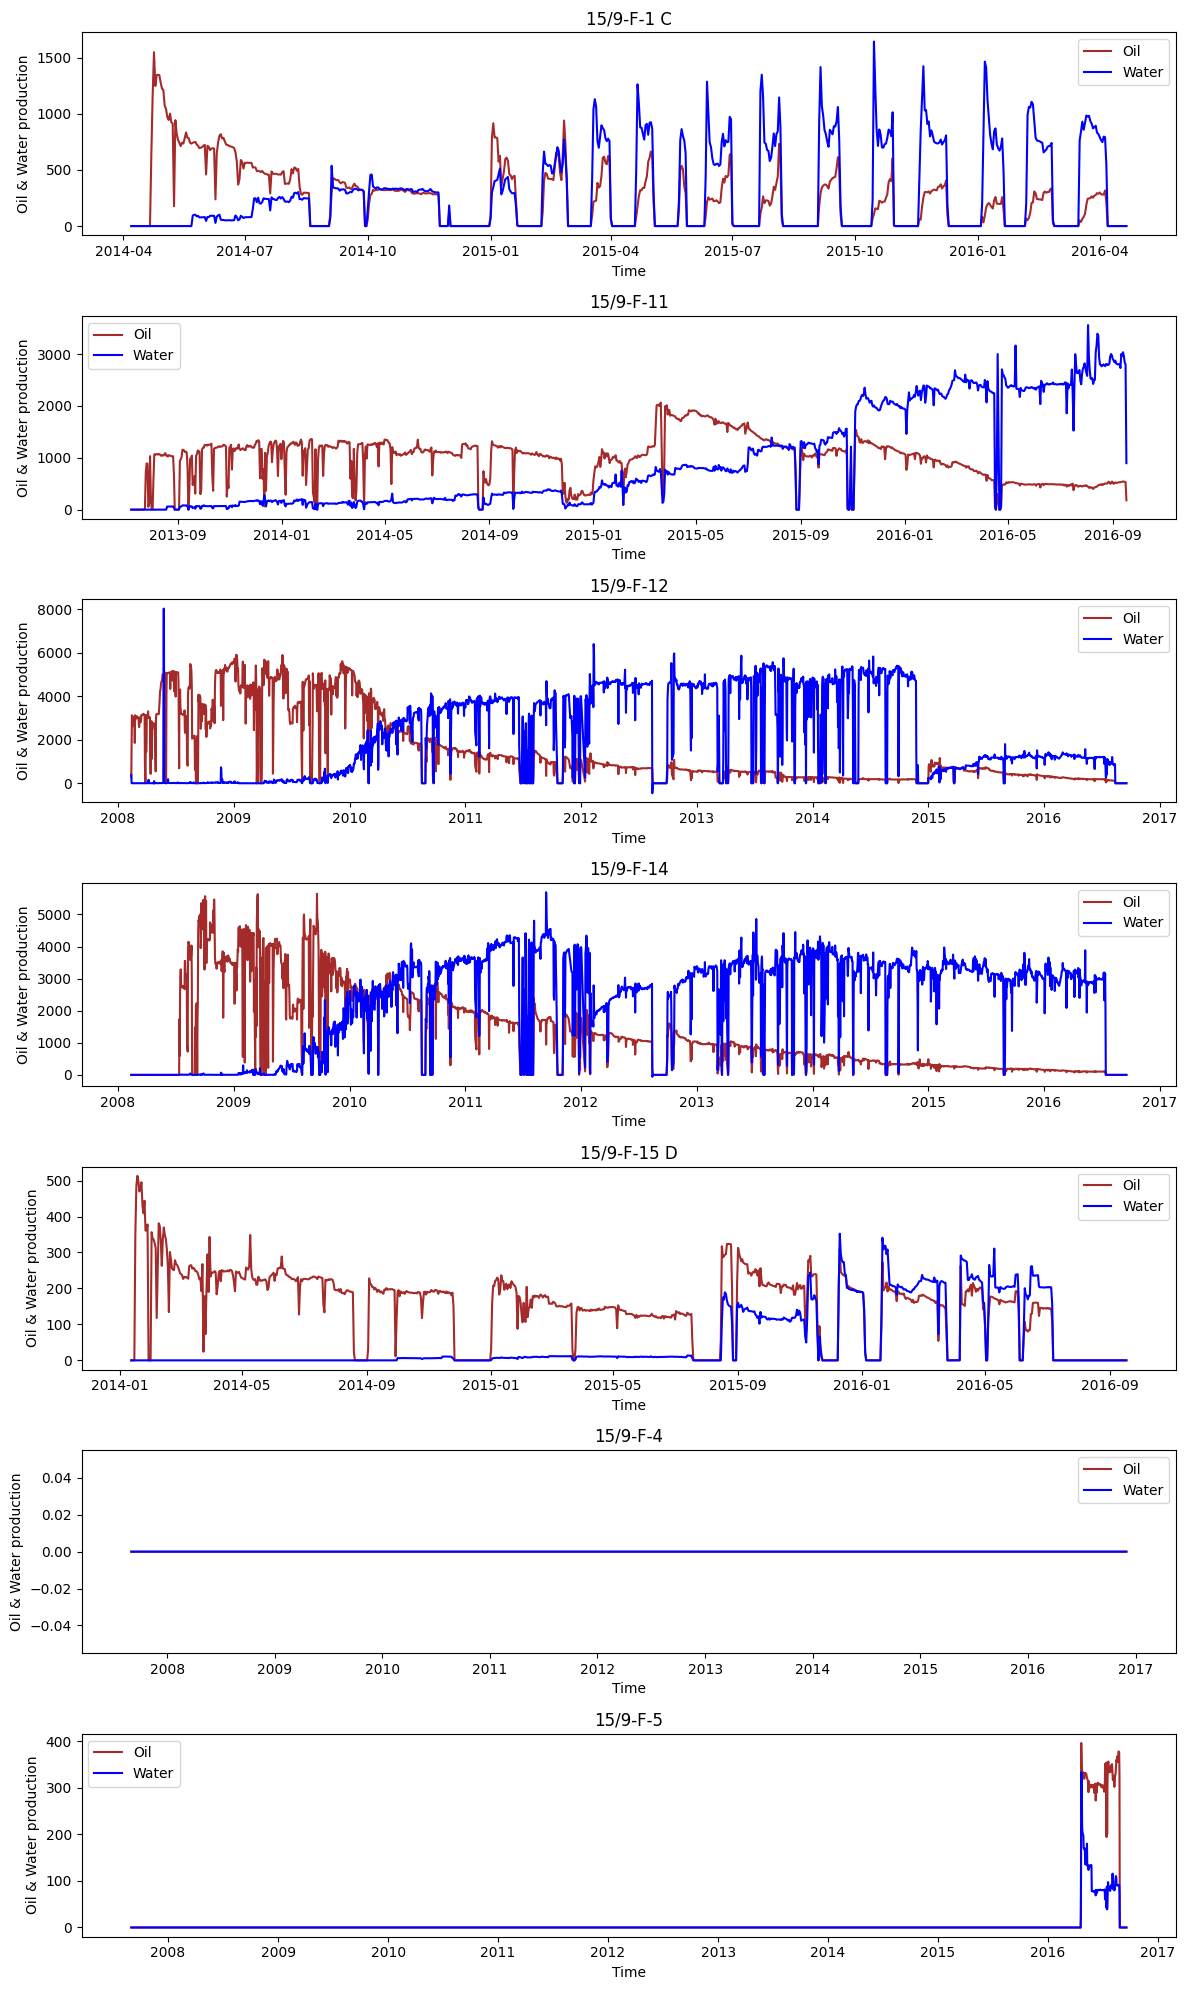

In [29]:
# Relationship between oil production and water production for each well
wells = daily_df["NPD_WELL_BORE_NAME"].unique()  # Get all unique well names
plt.figure(figsize=(12,20))                      # Set the overall figure size

for i, well in enumerate(wells):                 # Loop through each well
    d = daily_df[daily_df["NPD_WELL_BORE_NAME"]==well]  # Filter data for this well
    plt.subplot(len(wells),1,i+1)                # Create a subplot for each well
    plt.plot(d["DATEPRD"], d["BORE_OIL_VOL"], label="Oil",color = "Brown")    # Plot oil production over time
    plt.plot(d["DATEPRD"], d["BORE_WAT_VOL"], label = "Water", color = "Blue")    # Plot water production over time
    plt.title(well)                              # Title with well name
    plt.xlabel("Time")                           # X-axis label
    plt.ylabel("Oil & Water production")         # Y-axis label
    plt.legend()                                 # Show legend

plt.tight_layout()                               # Adjust layout to prevent overlap
plt.show                                         # Show the plots (missing parentheses, should be plt.show())

/var/folders/w3/6g99c6wj1wn4plrslv4vrd2m0000gn/T/ipykernel_14985/1177116378.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


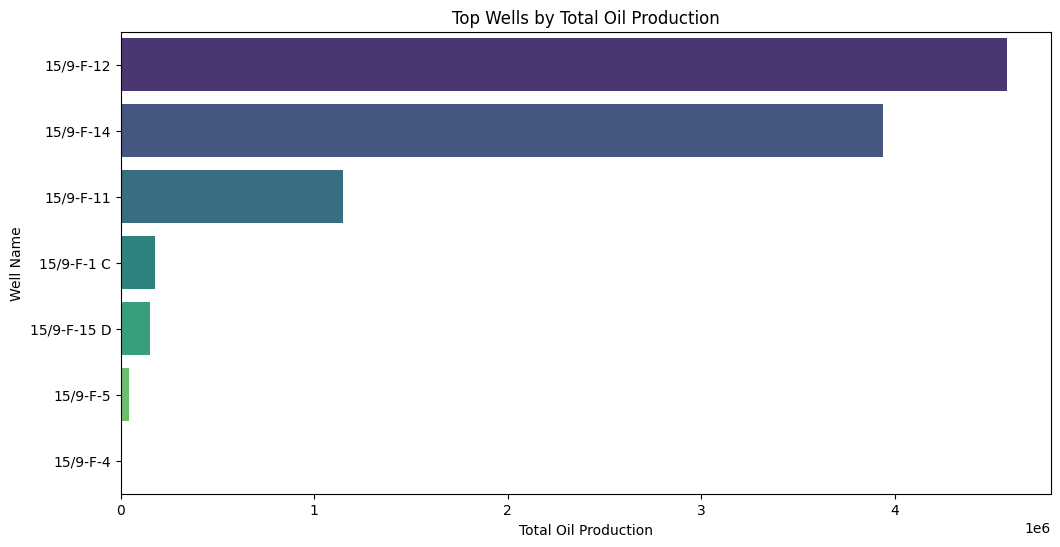

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(
	x=('BORE_OIL_VOL', 'sum'),
	y=('NPD_WELL_BORE_NAME', ''),
	data=well_summary.head(10),
	palette='viridis'
)
plt.title('Top Wells by Total Oil Production')
plt.xlabel('Total Oil Production')
plt.ylabel('Well Name')
plt.show()

In [18]:
target_col = 'BORE_OIL_VOL'
features_cols = [
    "ON_STREAM_HRS",
    "AVG_CHOKE_SIZE_P",
    "AVG_WHP_P",
    "AVG_WHT_P",
    "AVG_DOWNHOLE_PRESSURE",
    "AVG_DOWNHOLE_TEMPERATURE",
    "AVG_DP_TUBING",
    "AVG_ANNULUS_PRESS"
]
well_name=daily_df['NPD_WELL_BORE_NAME'].unique()[0]
well_data=daily_df[daily_df['NPD_WELL_BORE_NAME']==well_name].sort_values("DATEPRD")
well_data[features_cols + [target_col]].head()

,ON_STREAM_HRS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,BORE_OIL_VOL
0,0.0,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0
1,0.0,1.003059,0.00000,0.00000,NaN,NaN,NaN,0.0,0.0
2,0.0,0.979008,0.00000,0.00000,NaN,NaN,NaN,0.0,0.0
3,0.0,0.545759,0.00000,0.00000,NaN,NaN,NaN,0.0,0.0
4,0.0,1.215987,33.09788,10.47992,310.37614,96.87589,277.27826,0.0,0.0


In [19]:
well_data[features_cols] = well_data[features_cols].fillna(0)


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
well_data[features_cols] = scaler.fit_transform(well_data[features_cols])

In [21]:
import numpy as np

def create_sequences(data, features, target, window=7):
    sequences = []
    targets = []
    for i in range(len(data) - window):
        seq = data[features].iloc[i:i+window].values
        tgt = data[target].iloc[i+window]
        sequences.append(seq)
        targets.append(tgt)
    return np.array(sequences), np.array(targets)
X, y = create_sequences(well_data, features_cols, target_col, window=7)
print(f"Input shape: {X.shape}, Target shape: {y.shape}")

Input shape: (739, 7, 8), Target shape: (739,)


Mean Squared Error: 25380.82921007047
R2 Score: -0.4137985578413985


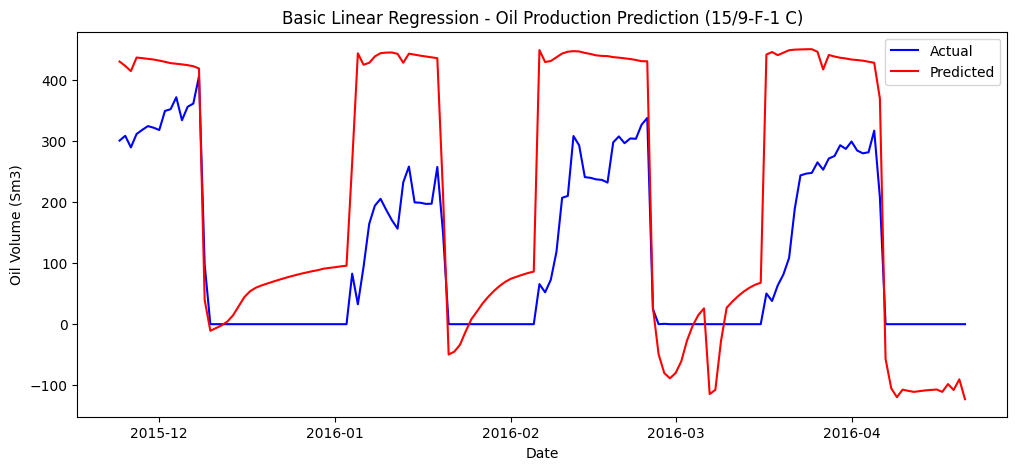

In [22]:
# 1️⃣ Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2️⃣ Select well data (first well)
well_name = daily_df["NPD_WELL_BORE_NAME"].unique()[0]
well_data = daily_df[daily_df["NPD_WELL_BORE_NAME"] == well_name].sort_values("DATEPRD")

# 3️⃣ Select features and target
feature_cols = ["ON_STREAM_HRS", "AVG_CHOKE_SIZE_P", "AVG_WHP_P", "AVG_WHT_P"]
target_col = "BORE_OIL_VOL"

X = well_data[feature_cols].fillna(0)
y = well_data[target_col].fillna(0)

# 4️⃣ Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 5️⃣ Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 6️⃣ Make predictions
y_pred = model.predict(X_test)

# 7️⃣ Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# 8️⃣ Plot predictions vs actual
plt.figure(figsize=(12,5))
plt.plot(well_data["DATEPRD"].iloc[-len(y_test):], y_test, label="Actual", color="blue")
plt.plot(well_data["DATEPRD"].iloc[-len(y_test):], y_pred, label="Predicted", color="red")
plt.title(f"Basic Linear Regression - Oil Production Prediction ({well_name})")
plt.xlabel("Date")
plt.ylabel("Oil Volume (Sm3)")
plt.legend()
plt.show()


In [23]:
future_features = [[24, 80, 300, 50]]  # Example: hours, choke%, WHP, WHT
predicted_oil = model.predict(future_features)
print(f"Predicted Oil Production for next day: {predicted_oil[0]:.2f} Sm3")

Predicted Oil Production for next day: 851.86 Sm3


/Users/anmol/volve_production_forecast/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


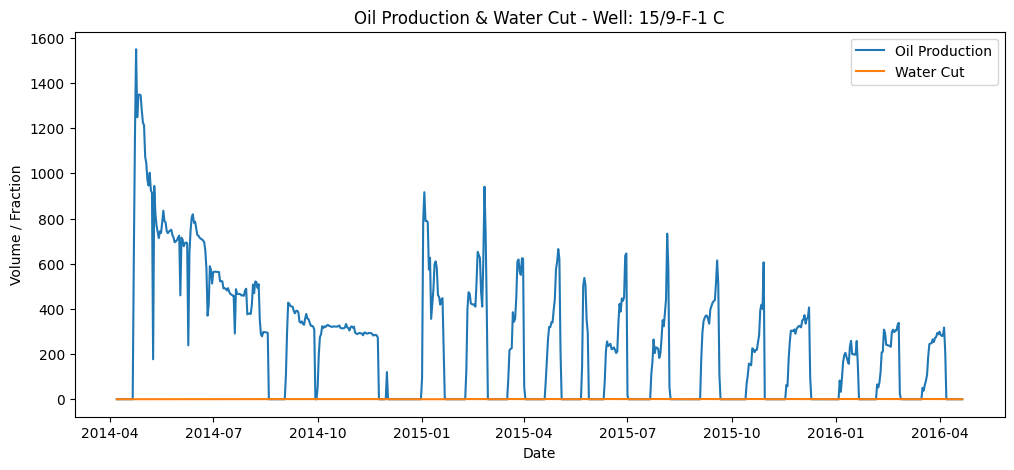

In [24]:
# 1️⃣ Convert date column to datetime
daily_df["DATEPRD"] = pd.to_datetime(daily_df["DATEPRD"])

# 2️⃣ Sort data by date for each well
daily_df = daily_df.sort_values(["NPD_WELL_BORE_NAME", "DATEPRD"])

# 3️⃣ Fill missing numeric values with 0
numeric_cols = ["ON_STREAM_HRS", "AVG_CHOKE_SIZE_P", "AVG_WHP_P", 
                "AVG_WHT_P", "BORE_OIL_VOL", "BORE_GAS_VOL", "BORE_WAT_VOL"]
daily_df[numeric_cols] = daily_df[numeric_cols].fillna(0)

# 4️⃣ Create new features (optional but useful)
# Example: Water cut (WC) = Water / (Oil + Water)
daily_df["WATER_CUT"] = daily_df["BORE_WAT_VOL"] / (daily_df["BORE_OIL_VOL"] + daily_df["BORE_WAT_VOL"] + 1e-6)

# Example: Gas-Oil Ratio (GOR) = Gas / Oil
daily_df["GOR"] = daily_df["BORE_GAS_VOL"] / (daily_df["BORE_OIL_VOL"] + 1e-6)

# 5️⃣ Quick visualization: Oil vs Water Cut for one well
well_name = daily_df["NPD_WELL_BORE_NAME"].unique()[0]
well_data = daily_df[daily_df["NPD_WELL_BORE_NAME"] == well_name]

plt.figure(figsize=(12,5))
plt.plot(well_data["DATEPRD"], well_data["BORE_OIL_VOL"], label="Oil Production")
plt.plot(well_data["DATEPRD"], well_data["WATER_CUT"], label="Water Cut")
plt.title(f"Oil Production & Water Cut - Well: {well_name}")
plt.xlabel("Date")
plt.ylabel("Volume / Fraction")
plt.legend()
plt.show()


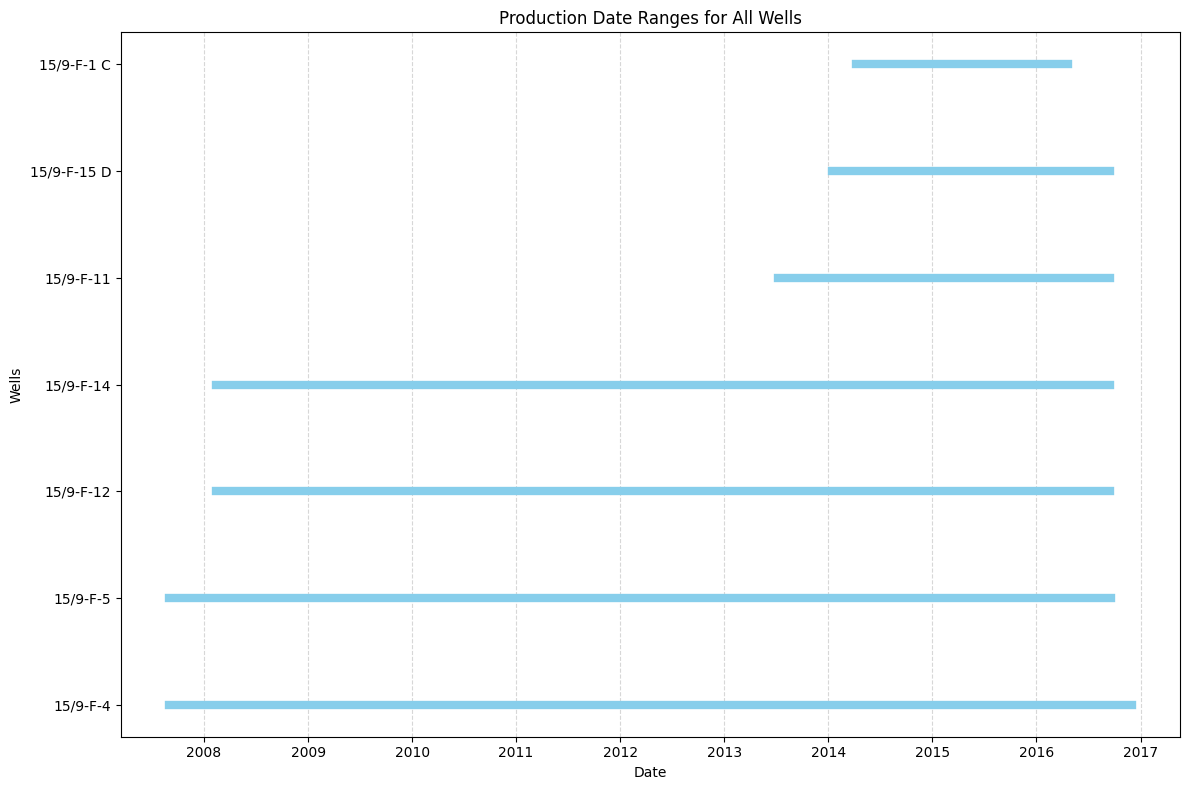

In [25]:
import matplotlib.pyplot as plt

# 1️⃣ Get min and max date for each well
well_ranges = daily_df.groupby("NPD_WELL_BORE_NAME")["DATEPRD"].agg(["min","max"]).reset_index()

# 2️⃣ Sort wells by start date
well_ranges = well_ranges.sort_values("min")

# 3️⃣ Plot timeline
plt.figure(figsize=(12,8))
for i, row in enumerate(well_ranges.itertuples()):
    plt.plot([row.min, row.max], [i, i], color='skyblue', linewidth=6)
    
plt.yticks(range(len(well_ranges)), well_ranges["NPD_WELL_BORE_NAME"])
plt.xlabel("Date")
plt.ylabel("Wells")
plt.title("Production Date Ranges for All Wells")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Epoch 1/20


/Users/anmol/volve_production_forecast/venv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0287 - val_loss: 0.0076
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0113 - val_loss: 0.0039
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0098 - val_loss: 0.0034
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0092 - val_loss: 0.0027
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - val_loss: 0.0028
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - val_loss: 0.0022
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0073 - val_loss: 0.0018
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0067 - val_loss: 0.0037
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - val_loss: 0.0018
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - val_loss: 0.0016
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - val_loss: 0.0018
Epoch 12/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0062 - val_loss: 0.

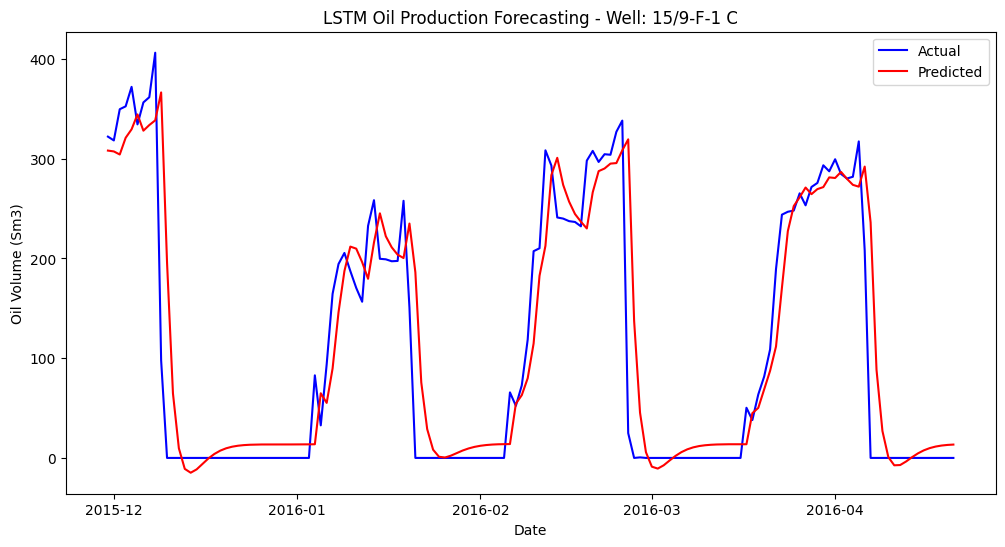

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 1️⃣ Select a single well
well_name = daily_df["NPD_WELL_BORE_NAME"].unique()[0]
well_data = daily_df[daily_df["NPD_WELL_BORE_NAME"] == well_name].sort_values("DATEPRD")

# 2️⃣ Use only oil production for now
oil_data = well_data["BORE_OIL_VOL"].values.reshape(-1,1)

# 3️⃣ Normalize values (LSTM works best with 0-1 scaled data)
scaler = MinMaxScaler()
oil_scaled = scaler.fit_transform(oil_data)

# 4️⃣ Create sequences (lookback = 30 days to predict next day)
def create_sequences(data, lookback=30):
    X, y = [], []
    for i in range(len(data)-lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

lookback = 30
X, y = create_sequences(oil_scaled, lookback)

# 5️⃣ Train-test split (last 20% for testing)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 6️⃣ Build LSTM model
model = Sequential()
model.add(LSTM(50, activation="relu", input_shape=(lookback,1)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

# 7️⃣ Train
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test,y_test), verbose=1)

# 8️⃣ Predict
y_pred = model.predict(X_test)

# 9️⃣ Inverse scale back to real values
y_test_rescaled = scaler.inverse_transform(y_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)

# 🔟 Plot results
plt.figure(figsize=(12,6))
plt.plot(well_data["DATEPRD"].iloc[-len(y_test):], y_test_rescaled, label="Actual", color="blue")
plt.plot(well_data["DATEPRD"].iloc[-len(y_test):], y_pred_rescaled, label="Predicted", color="red")
plt.title(f"LSTM Oil Production Forecasting - Well: {well_name}")
plt.xlabel("Date")
plt.ylabel("Oil Volume (Sm3)")
plt.legend()
plt.show()
